# Topic Explorer Notebook Tutorial

The InPhO Topic Explorer features a powerful interactive coding environment that enables direct manipulation of the corpus and models, in contrast to the web visualization.

When you run the `vsm notebook` command, several things happen:
1.  The Topic Explorer creates a new folder called `notebooks` and places several files inside it:
     -  **corpus.py** contains Python code which imports the Corpus object and a function that will load models trained on your corpus. It gathers this information from your `CORPUS.ini` file, where `CORPUS` is the name of the folder you prepared. More information on this special file is below.
     -  **Topic Explorer Tutorial.ipynb** is this file, which provides the skeleton documentation for interacting with the models.
     -  Other **ipynb** files, containing analyses that can be re-run on your own corpora.
2.  The Topic Explorer launches a [Jupyter Notebook](http://jupyter.org/). This allows you to program in Python on your local computer using the browser, rather than a terminal or other program. 

## Introducing Jupyter
If you look in the address bar of your browser, it should start with something like `localhost:8888/notebooks/Topic%20Explorer%20Tutorial.ipynb`. If you open a new tab or browser window and type in `localhost:8888` you will open the same list of files and be able to edit multiple files at once. Note that editing the same file in multiple tabs may cause you to accidentally overwrite your data. Jupyter does not check if the file is already open.

Also, note that if the first portion of the url (`localhost:8888`) is different, you will need to enter what it says on your computer to open a new tab. Most likely the "port number" (`8888`) will be different, and may indicate you have a second instance of `vsm notebook` or another Jupyter Notebook server running.


### Running Cells
The Jupyter notebook operates through individual *cells* that run Python code. To run a cell press the "run cell" (play) button or select the cell by clicking on it, then select in the Jupyter menu "Cell > Run Cells".

Try running the cell below:

In [5]:
print "Hello world!"

Hello world!


Immediately below the cell, the `Hello world!` should be printed, and to the left of the cell it should say `In [1]:`.

#### A note on kernels and brackets
If the number `[1]` is different, nothing is wrong, so long as there is a number printed.

The number in brackets (`[1]`) counts the number of times you have run a cell in this notebook session. A notebook session is tied to a *kernel*. The kernel runs the Python code. If you wish to reset the numbers and run your code step-by-step, starting from `[1]` again, go to the menu and select "Kernel > Restart & Run All".

If the number appears as `In [*]:` that means that the cell is currently running. When it changes to a number (`[2]`), then the files have completed importing.

If you feel this is taking an absurdly long time to load (in excess of a few seconds), please press the stop button and notify the package developers. There might be a bug in the modeling software.

### Errors and Debugging
Each cell automatically calls `print` on the last line of the cell. Run the cell below to see an example:

In [1]:
print 'hello'

hello


Let's use this to print `Hello world!` once again:

**D'oh!** This should have raised a `SyntaxError: invalid syntax`.

Note the message `File "<ipython-input-5-59ca0efa9f56>", line 1` (the portion after `ipython-input` may be different). This tells you which line in the program errored. If you have errors in more advanced code, the line number will be very helpful in diagnosing the problem.

For now, change the cell above to `"Hello world!"` and run again to get the proper output.

## Importing `corpus.py`
Now that you know how to run a cell, we can begin interacting with the topic models. First we will import your corpus objects. Select and run the cell below:

In [2]:
from corpus import *

Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K{0}-document-200.npz


You will now have access to several variables, the most important of which are:
 -  `c` -- The `vsm.Corpus` object
 -  `lda_v` -- A dictionary containing each of the `vsm.LdaViewer` instances. You can access a particular model with `lda_v[k]`, substituting k for a particular number, like `lda_v[20]` for the 20-topic model. If the model for that number of topics has not been trained, it will error.
 -  `topic_range` -- A list of the trained models (e.g., `[20, 40, 60, 80]`)
 -  `context_type` -- A string containing the particular context type modeled (e.g., `"sentence"`, `"document"`, `"article"`)

### Introducing the `vsm` module

The InPhO Topic Explorer is comprised of two modules:
1. The `topicexplorer` module contains code for the visualization and user interfaces.
2. The `vsm` module contains code for modeling differnet corpora. 

In order to make use of the term frequency (TF), term frequency-inverse document frequency (TfIdf), and latent semantic analysis (LSA) models, we must import the main vsm module:

In [3]:
from vsm import *

## Interacting with the Corpus: Term Frequencies

The command above has loaded your `Corpus` object into the `c` variable. You can see the list of all words that are in your corpus by typing `c.words` into a code cell:

In [4]:
c.words

array([u'10', u'11', u'12', ..., u'\ue859', u'\ufe51', u'\ufe56'],
      dtype=object)

Note that it only shows the first few and last few unique words in the corpus, alphabetically sorted. 

What if we want to get a list of how often each word occurs? For that, we can use the `vsm.model.TF` to build a frequency distribution over the terms in the corpus:

In [5]:
# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

# print the most frequent terms in the document
# remember that IPython automatically prints the last cell of a document
tf_v.coll_freqs()




LabeledColumn([(u'\u4eba', 58190), (u'\u738b', 40022), (u'\u5929', 27953),
               ..., (u'\u6478',     6), (u'\u9647\u4ea9',     6),
               (u'\u7c2c',     6)],
              dtype=[('word', '<U14'), ('value', '<i8')])

In [11]:
#  tf.matrix是一个矩阵，每一行代表一个词，每一列代表一个文档每个单元：（词语，文档）  词频   获取词频的方法是，.data属性，可以
#拿到一个列表，是各个文档中出现的次数
#  tf.matrix.getcol(x) 是一个矩阵，只有一列，代表第x个文本中，每一个字出现的频率
#  tf.matrix.getraw(x)是一个矩阵，只有一行，代表第x个词，在对应每一个文档中出现的频数

print tf.matrix.shape,tf.matrix.getcol(1515).shape,tf.matrix.getrow(1515).shape
#wf = []
#whf = []
#for i in range(0,1516):
#    whf.append(tf.matrix.getcol(i))
#    
#    wf.append(sum(whf[i].data))
#print wf[:10]

(24709, 1516) (24709, 1) (1, 1516)


In [38]:
tf.matrix.getrow(0)


<1x1516 sparse matrix of type '<type 'numpy.int32'>'
	with 69 stored elements in Compressed Sparse Row format>

After running the cell above, you should see a table with the 20 most frequently used words.

In [8]:
#此处应该确认一下，是否是对应关系。此字词是从cwords里面依次读取出来的
#cwords=[]
#for a in c.words:
#    cwords.append(''.join(a).encode('utf-8'))
#rows = zip(cwords,wf)
#import csv
#with open('wordsfrequency.csv','w') as f:
#    f_csv = csv.writer(f)
#    f_csv.writerow(headers)
#    f_csv.writerows(rows)

## Interacting with Topic Models

The InPhO Topic Explorer doesn't just work with term frequencies though - it creates LDA topic models. Through the notebook interface these models can be powerfully manipulated to produce new analyses.

First, let's select a primary model to investigate, and load it into the variable `v`:

In [6]:
# print the number of topics in the first model
print topic_range[0]
# remember that list indexes start with 0 not 1!

# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[0]

# load the topic model
v = lda_v[k]

20
Loading LDA data from /home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K20-document-200.npz


The above code loads the first topic model into a viewer object. We have used the `topic_range[0]` instead of simply stating a number so that this same demo notebook will work with any model settings you've prepared. This portability enables us to write analyses that can be replicated across any corpus, and is one of the real strengths of using the `from corpus import *` model of coding your notebooks. If others are using the Topic Explorer to generate their objects, they can run the exact same analysis on different corpora, so long as the variable names are consistent

### `v.topics()`
First, lets print a list of topics:

In [7]:
v.topics()
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
count = 0
kongzi = []
mengzi = []
xunzi =[]

for label in v.labels[:]:
    if '孟子' in label:
        mengzi.append(count)
    elif '论语' in label:
        kongzi.append(count)
    elif '荀子' in label:
        xunzi.append(count)
    count = count+1
print 'mengzi has %d files'%len(mengzi)
print 'kongzi has %d files'%len(kongzi)
print 'xunzi has %d files'%len(xunzi)

In [54]:
v.topics()


[LabeledColumn([(u'\u8c13\u4e4b', 0.03985420987010002),
        (u'\u5434', 0.01346581894904375), (u'\u9ece', 0.013388433493673801),
        ..., (u'\u7e8d', 7.738523777334194e-07),
        (u'\u5bbd\u4ec1', 7.738523777334194e-07),
        (u'\u65e0\u95e8', 7.738523777334194e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u738b', 0.049134571105241776),
        (u'\u592a\u540e', 0.029029248282313347),
        (u'\u7acb', 0.02793656662106514), ...,
        (u'\u5bb9\u5bb9', 3.6422653693080065e-07),
        (u'\u5bb9\u57ce', 3.6422653693080065e-07),
        (u'\u5916\u51fa', 3.6422653693080065e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u523a', 0.025155026465654373),
        (u'\u9ec3', 0.024106917902827263), (u'\u8db3', 0.02153031900525093),
        ..., (u'\u52b3\u9038', 4.367111898773146e-07),
        (u'\u8ae6', 4.367111898773146e-07),
        (u'\u56f0\u4e4f', 4.367111898773146e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u672c', 0.07875248789787292), (u'\u9b91', 0.0564035028219223),
        (u'\u664f\u5b50', 0.043091654777526855), ...,
        (u'\u53c8\u5982', 2.868929982469126e-07),
        (u'\u8825', 2.868929982469126e-07), (u'1', 2.868929982469126e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5c06', 0.021530315279960632), (u'\u654c', 0.0199192576110363),
        (u'\u5175', 0.017795590683817863), ...,
        (u'\u7f01', 7.322980195567652e-07),
        (u'\u5be5\u5ed3', 7.322980195567652e-07),
        (u'1', 7.322980195567652e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5175', 0.02680499106645584), (u'\u653b', 0.0189720019698143),
        (u'\u4e00', 0.017750343307852745), ...,
        (u'\u6709\u53f8', 3.5931105912823114e-07),
        (u'\u6709\u52b3', 3.5931105912823114e-07),
        (u'1', 3.5931105912823114e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5929', 0.016604341566562653),
        (u'\u6c14', 0.015994135290384293),
        (u'\u751f', 0.015962019562721252), ...,
        (u'\u5b9a\u5236', 3.2116059855979984e-07),
        (u'\u5b9a\u5219', 3.2116059855979984e-07),
        (u'1', 3.2116059855979984e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u8109', 0.050137318670749664),
        (u'\u75c5', 0.034695375710725784),
        (u'\u6c14', 0.014799023978412151), ...,
        (u'\u628a', 4.949336016579764e-07),
        (u'\u6287', 4.949336016579764e-07), (u'1', 4.949336016579764e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4ee4', 0.02019626833498478), (u'\u4e8b', 0.014113979414105415),
        (u'\u590d', 0.013662771321833134), ...,
        (u'\u7bc1', 1.8048318395358365e-07),
        (u'\u5b88\u5fc3', 1.8048318395358365e-07),
        (u'\u65e0\u95e8', 1.8048318395358365e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5341', 0.017458830028772354),
        (u'\u590f', 0.016696278005838394),
        (u'\u6625', 0.015572517178952694), ...,
        (u'\u7fe5', 4.013427883364784e-07),
        (u'\u7fe9', 4.013427883364784e-07),
        (u'\u65e0\u95e8', 4.013427883364784e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5149\u6b66', 0.019788367673754692),
        (u'\u4faf', 0.018736353144049644),
        (u'\u66f4\u59cb', 0.01823539473116398), ...,
        (u'\u82b3\u9999', 5.009581514059391e-07),
        (u'\u5739', 5.009581514059391e-07),
        (u'\u58af', 5.009581514059391e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6c11', 0.01723650097846985), (u'\u5fb7', 0.016636084765195847),
        (u'\u5929\u4e0b', 0.014527304098010063), ...,
        (u'\u7cf1', 1.4644298573784909e-07),
        (u'\u5bab\u6bbf', 1.4644298573784909e-07),
        (u'1', 1.4644298573784909e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6587', 0.009310265071690083),
       

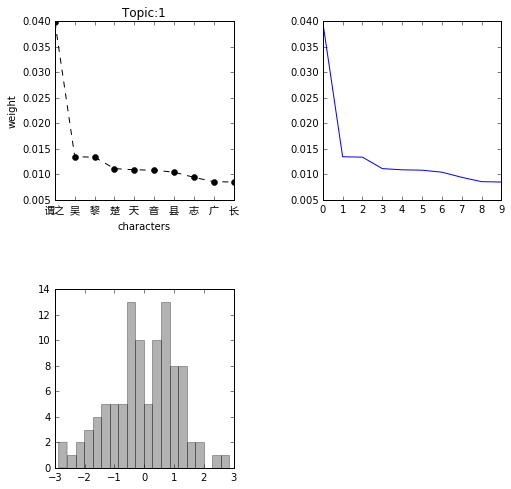

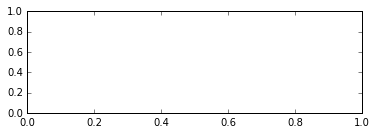

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/hongliang/Downloads/msyh.ttf/msyh.ttf')
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

word = []
wordweight = []
for a in v.topics()[0]:
    word.append(a[0])
    wordweight.append(a[1])
wordsweight = zip(word[:10],wordweight[:10])
print wordsweight[:1]

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)  
ticks = ax1.set_xticks(range(0,10))
#labels = ax1.set_xticklabels(['我','a','','a','a,','a','a','a,','a,','a'])
labels = ax1.set_xticklabels(word[:10],fontproperties=myfont)
plt.plot(wordweight[:10],'ko--')

ax2 = fig.add_subplot(2,2,2)
plt.plot(wordweight[:10])
ax3 = fig.add_subplot(2,2,3)
ax3.hist(randn(100),bins=20,color='k',alpha=0.3)
plt.subplots_adjust(wspace = 0.5,hspace = 0.5)
ax1.set_xlabel('characters')
ax1.set_ylabel('weight')
d=1
ax1.set_title('Topic:%d'%d)
fig2 = plt.figure()
ax4 = fig2.add_subplot(2,1,2)

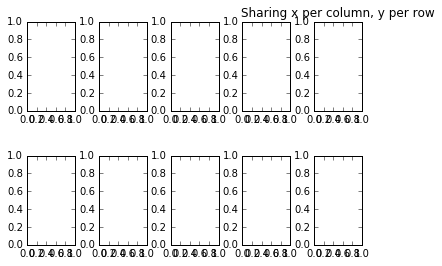

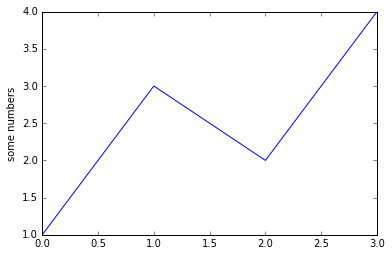

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,3,2,4])
plt.ylabel('some numbers')
plt.show()

In [3]:
from pandas import Series,DataFrame
import pandas as pd
data = {"name":["握草","google","facebook"], "marks":[200,400,800], "price":[9, 3, 7]} 
f = DataFrame(data)
f

,marks,name,price
0,200,握草,9
1,400,google,3
2,800,facebook,7


In [ ]:
#在孔孟荀间，求频率
wfkmx = []
whfkmx = []
for i in range(0,1):
    whfkmx.append(tf.matrix.getrow(i))
    
    wfkmx.append(sum(whfkmx[i].data[item] for item in mengzi))
print wf[:10]
tf.matrix.getrow(0)

To change the number of words printed per topic, use the `print_len` argument:

In [105]:
v.topics(print_len=20)


for i in range(0,100):
    x = 0
    ww = []
    wwa =[]
    wwb = []
    wwc = []
    for a in v.topics():
        if x == i:
            for b in a: 
                ww.append(b)
        x = x+1
    
    #print ww
    for a in ww[:10]:
        wwa.append(a[0].encode('utf-8'))
        wwb.append(a[1])
        wwc.append(i)
    printrow = zip(wwc,wwa,wwb)
    
    
        
    with open('topicdweight.csv','a+') as f:
        f_csv = csv.writer(f)
    #    f_csv.writerow(headers)
        f_csv.writerows(printrow)

In [108]:
#生成表格 主题+前五个词
for i in range(0,100):
    x = 0
    ww = []
    wwa =[]
    wwb = []
    wwc = []
    for a in v.topics():
        if x == i:
            for b in a: 
                ww.append(b)
        x = x+1
    
    for a in ww[:10]:
        wwa.append(a[0].encode('utf-8'))
    printrow = [i]+wwa
    print printrow
    
    
        
    with open('topic5words.csv','a+') as f:
        f_csv = csv.writer(f)
    #    f_csv.writerow(headers)
        f_csv.writerow(printrow)

[0, '\xe8\xb0\x93\xe4\xb9\x8b', '\xe5\x90\xb4', '\xe9\xbb\x8e', '\xe6\xa5\x9a', '\xe5\xa4\xa9', '\xe9\x9f\xb3', '\xe5\x8e\xbf', '\xe5\xbf\x97', '\xe5\xb9\xbf', '\xe9\x95\xbf']
[1, '\xe7\x8e\x8b', '\xe5\xa4\xaa\xe5\x90\x8e', '\xe7\xab\x8b', '\xe5\xb8\x9d', '\xe5\xad\x9d', '\xe5\x90\x8e', '\xe4\xbe\xaf', '\xe5\x9b\xbd', '\xe7\x9a\x87\xe5\x90\x8e', '\xe8\x96\xa8']
[2, '\xe5\x88\xba', '\xe9\xbb\x83', '\xe8\xb6\xb3', '\xe7\x82\xba', '\xe9\x87\x9d', '\xe8\xa1\x80', '\xe5\x85\xa7', '\xe8\x81\x9e', '\xe4\xb8\x8a', '\xe9\xaa\xa8']
[3, '\xe6\x9c\xac', '\xe9\xae\x91', '\xe6\x99\x8f\xe5\xad\x90', '\xe9\xbd\x8a', '\xe7\x82\xba', '\xe8\xb6\x99', '\xe5\xa7\x9a', '\xe6\xa5\x9a', '\xe4\xba\x8c', '\xe8\xa3\x9c']
[4, '\xe5\xb0\x86', '\xe6\x95\x8c', '\xe5\x85\xb5', '\xe5\xa4\xaa', '\xe6\x88\x98', '\xe5\x86\x9b', '\xe5\x85\xac\xe6\x9b\xb0', '\xe5\x8d\x92', '\xe6\xad\xa6', '\xe5\x87\xbb']
[5, '\xe5\x85\xb5', '\xe6\x94\xbb', '\xe4\xb8\x80', '\xe4\xb8\x8a', '\xe6\x88\x98', '\xe5\xae\x88', '\xe9\xa6\x80', '\xe

In [103]:
v.topics()[2][:5][1][1]

# v.topics()[主题数][按照重量排序词语排名][词语数][显示词语名字，或者重量]


[(0, 4, 0), (1, 5, 1), (2, 6, 2)]

### Viewing Document-topic probabilities
The above code shows the topic-word distributions and allows us to estimate the quality of our topics.

#### `v.labels`
The property `v.labels` (without parentheses) returns a list of all documents in a corpus, and is useful for processing each document generically, wihtout having to look up the identifiers on the file system.

Below, we print the first 3 document labels:

In [91]:
for label in v.labels[:3]:
    print label

mirrorfunctions/兵家/司马法/仁本第一.txt
mirrorfunctions/兵家/司马法/定爵第三.txt
mirrorfunctions/兵家/司马法/天子之义第二.txt


#### `v.doc_topics(doc_or_docs)`
Each document-topic distribution can be examined with `v.doc_topics()`, which takes as its argument either a single label or a list of labels. Below we view the distribution for the first 3 documents.

In [92]:
v.doc_topics(v.labels[:3])

[LabeledColumn([(11, 0.40924131870269775), (76, 0.15720871090888977),
        (5, 0.12197835743427277), (66, 0.07048782706260681),
        (89, 0.05964771658182144), (96, 0.05693768337368965),
        (97, 0.04609757661819458), (43, 0.0406775176525116),
        (37, 0.03254744037985802), (22, 0.0027371286414563656),
        (62, 2.7106067136628553e-05), (34, 2.7100897568743676e-05),
        (46, 2.7100897568743676e-05), (45, 2.7100897568743676e-05),
        (57, 2.7100897568743676e-05), (58, 2.7100897568743676e-05),
        (42, 2.7100897568743676e-05), (39, 2.7100897568743676e-05),
        (38, 2.7100897568743676e-05), (59, 2.7100897568743676e-05),
        (36, 2.7100897568743676e-05), (47, 2.7100897568743676e-05),
        (99, 2.7100897568743676e-05), (33, 2.7100897568743676e-05),
        (29, 2.7100897568743676e-05), (61, 2.7100897568743676e-05),
        (26, 2.7100897568743676e-05), (24, 2.7100897568743676e-05),
        (23, 2.7100897568743676e-05), (21, 2.7100897568743676e-05),
        (18, 2.7100897568743676e-05), (14, 2.7100897568743676e-05),
        (12, 2.7100897568743676e-05), (10, 2.7100897568743676e-05),
        (9, 2.7100897568743676e-05), (7, 2.7100897568743676e-05),
        (4, 2.7100897568743676e-05), (27, 2.7100897568743676e-05),
        (49, 2.7100897568743676e-05), (0, 2.7100897568743676e-05),
        (88, 2.7100897568743676e-05), (70, 2.7100897568743676e-05),
        (92, 2.7100897568743676e-05), (69, 2.7100897568743676e-05),
        (68, 2.7100897568743676e-05), (90, 2.7100897568743676e-05),
        (93, 2.7100897568743676e-05), (72, 2.7100897568743676e-05),
        (75, 2.7100897568743676e-05), (86, 2.7100897568743676e-05),
        (81, 2.7100897568743676e-05), (65, 2.7100897568743676e-05),
        (64, 2.7100897568743676e-05), (84, 2.7100897568743676e-05),
        (41, 2.7100277293357067e-05), (87, 2.7100277293357067e-05),
        (79, 2.7100277293357067e-05), (28, 2.7100277293357067e-05),
        (82, 2.7100277293357067e-05), (94, 2.7100277293357067e-05),
        (51, 2.7100277293357067e-05), (54, 2.7100277293357067e-05),
        (8, 2.7100251827505417e-05), (19, 2.7100251827505417e-05),
        (85, 2.7100251827505417e-05), (1, 2.7100251827505417e-05),
        (20, 2.7100251827505417e-05), (2, 2.7100251827505417e-05),
        (17, 2.7100251827505417e-05), (3, 2.7100251827505417e-05),
        (6, 2.7100251827505417e-05), (16, 2.7100251827505417e-05),
        (15, 2.7100251827505417e-05), (95, 2.7100251827505417e-05),
        (13, 2.7100251827505417e-05), (91, 2.7100251827505417e-05),
        (60, 2.7100251827505417e-05), (83, 2.7100251827505417e-05),
        (71, 2.7100251827505417e-05), (56, 2.7100251827505417e-05),
        (55, 2.7100251827505417e-05), (53, 2.7100251827505417e-05),
        (52, 2.7100251827505417e-05), (50, 2.7100251827505417e-05),
        (98, 2.7100251827505417e-05), (48, 2.7100251827505417e-05),
        (67, 2.7100251827505417e-05), (44, 2.7100251827505417e-05),
        (40, 2.7100251827505417e-05), (25, 2.7100251827505417e-05),
        (73, 2.7100251827505417e-05), (74, 2.7100251827505417e-05),
        (35, 2.7100251827505417e-05), (77, 2.7100251827505417e-05),
        (78, 2.7100251827505417e-05), (32, 2.7100251827505417e-05),
        (31, 2.7100251827505417e-05), (63, 2.7100251827505417e-05),
        (80, 2.7100251827505417e-05), (30, 2.7100251827505417e-05)], 
       dtype=[('topic', '<i8'), ('value', '<f4')]),
 LabeledColumn([(5, 0.33395934104919434), (62, 0.20987194776535034),
        (11, 0.15330268442630768), (4, 0.07848528027534485),
        (37, 0.06936120986938477), (67, 0.06388676911592484),
        (88, 0.060237135738134384), (47, 0.025565657764673233),
        (12, 0.0036678779870271683), (46, 1.825204526539892e-05),
        (24, 1.825204526539892e-05), (26, 1.825204526539892e-05),
        (34, 1.825204526539892e-05), (55, 1.8248563719680533e-05),
        (52, 1.8248563719680533e-05), (98, 1.8248563719680533e-05),
        (39, 1.8248563719680533e-05), (45, 1.824856371

In [24]:
(v.model.Z==11).sum()
(v.model.Z==10).sum()


19719

#### `v.aggregate_doc_topics(doc_or_docs, normed_sum=False)`
While `v.doc_topics(doc_or_docs)` shows the distribution for each document, `v.aggregate_doc_topics()` shows the average distribution of a collection of documents. The `normed` argument tells the program whether to weight each document by its length (`normed_sum=True`) or to consider them all equally (`normed_sum=False`).

In [98]:
v.aggregate_doc_topics(v.labels[:], normed_sum=True)


LabeledColumn([(84, 0.04758273810148239), (58, 0.044132545590400696),
       (37, 0.03668983653187752), (76, 0.029211299493908882),
       (11, 0.024269381538033485), (85, 0.0215004775673151),
       (62, 0.020538298413157463), (14, 0.018339315429329872),
       (22, 0.017165938392281532), (67, 0.016652356833219528),
       (48, 0.01645776815712452), (55, 0.01609382964670658),
       (32, 0.015221375972032547), (78, 0.01521228812634945),
       (18, 0.014924325048923492), (86, 0.01491307932883501),
       (7, 0.013880801387131214), (77, 0.013219187036156654),
       (88, 0.013021919876337051), (70, 0.012936982326209545),
       (59, 0.0128931300714612), (15, 0.012889266945421696),
       (20, 0.011940320953726768), (5, 0.011802580207586288),
       (3, 0.011598208919167519), (97, 0.011414078064262867),
       (61, 0.011190501973032951), (82, 0.011138036847114563),
       (27, 0.010929044336080551), (19, 0.010912920348346233),
       (42, 0.010506781749427319), (64, 0.01046350970864296),
       (8, 0.010075794532895088), (99, 0.00980741623789072),
       (68, 0.009746899828314781), (51, 0.00963314063847065),
       (17, 0.009429131634533405), (50, 0.009388965554535389),
       (44, 0.009153349325060844), (63, 0.009006679989397526),
       (38, 0.008982675150036812), (93, 0.008806737139821053),
       (6, 0.008798404596745968), (47, 0.008768482133746147),
       (90, 0.008648794144392014), (13, 0.008623084984719753),
       (45, 0.008581281639635563), (0, 0.00854035560041666),
       (87, 0.008451610803604126), (98, 0.008256558328866959),
       (74, 0.008093361742794514), (43, 0.00802464410662651),
       (12, 0.007958506233990192), (49, 0.007863105274736881),
       (53, 0.007817910984158516), (75, 0.0077111185528337955),
       (36, 0.007507117465138435), (25, 0.0073712593875825405),
       (33, 0.00723433680832386), (39, 0.007172286510467529),
       (26, 0.007152920588850975), (4, 0.007138037588447332),
       (65, 0.007125802803784609), (91, 0.007053626235574484),
       (80, 0.00700575765222311), (89, 0.006806376855820417),
       (24, 0.006740304175764322), (34, 0.006661111488938332),
       (30, 0.006581971421837807), (1, 0.006446762476116419),
       (40, 0.006324945017695427), (92, 0.006309040822088718),
       (71, 0.005811174400150776), (9, 0.005784839391708374),
       (56, 0.005718000698834658), (29, 0.005711485631763935),
       (35, 0.005692628212273121), (16, 0.005431370344012976),
       (46, 0.005323102697730064), (69, 0.005279242992401123),
       (31, 0.004934318829327822), (54, 0.004917414393275976),
       (21, 0.004796462599188089), (96, 0.0045433747582137585),
       (79, 0.0044897571206092834), (23, 0.004478572867810726),
       (94, 0.004385334439575672), (72, 0.004302702844142914),
       (95, 0.004146851599216461), (60, 0.00412630895152688),
       (10, 0.0041121020913124084), (66, 0.00394853251054883),
       (28, 0.00368591514416039), (57, 0.003602418815717101),
       (73, 0.0032854618038982153), (81, 0.0028108989354223013),
       (52, 0.002583799883723259), (83, 0.002140066120773554),
       (41, 0.0018660805653780699), (2, 0.0016499921912327409)], 
      dtype=[('i', '<i8'), ('value', '<f4')])

In [109]:
#输出一个csv，第一列是主题数目，第二列是
with open('eachtopicdweight.csv','a+') as f:
    f_csv = csv.writer(f)
#    f_csv.writerow(headers)
    f_csv.writerows(v.aggregate_doc_topics(v.labels[:], normed_sum=True))
    
eachtopicweight = v.aggregate_doc_topics(v.labels[:], normed_sum=True)



In [112]:
import matplotlib.pyplot as plt

plt.plot(eachtopicweight)
plt.show()

### Comparing documents with `v.dist()`

Topic models give us a way to compare the siimilarity between two documents. To do this, we use `v.dist()`:

In [8]:
v.dist(v.labels[0], v.labels[1])


0.09351930541783653

In [9]:
help(v.dist)


#### Alternative distance measures
By default, the Topic Explorer uses the Jensen-Shannon Distance to calculate the distance between documents. The Jensen-Shannon Distance (JSD) is a symmetric measure based on information theory that characterizes the difference between two probability distributions.

However, several alternate methods are built into the `vsm.spatial` module. These include the Kullbeck-Liebler Divergence, which is an asymmetric component of the JSD and is used in [Murdock et al. (in review)](http://arxiv.org/abs/1509.07175) to characterize the cognitive surprise of a new text, given previous texts.

Rather than using the JSD and assuming symmetric divergence between items, we assume that the second document is encountered after the first, effectively measuring text-to-text divergence.

In [ ]:
# first import KL divergence:
from vsm.spatial import KL_div

# calculate KL divergence from the first document to the second
print "First to second", v.dist(v.labels[0], v.labels[1], dist_fn=KL_div)

# calculate KL divergence from the second document to the first, highlighting asymmetry:
print "Second to first", v.dist(v.labels[1], v.labels[0], dist_fn=KL_div)

# Using Python's Help System

There are many other functions in the InPhO Topic Explorer and the associated `vsm` library. These are extensively documented within the code. 

One little-known feature about Python is its capacity for introspection: by using the `help()` method, one can find out all methods and properties of an object. For example, if one wanted to know what methods could be called on their corpus object, you could run:

In [ ]:
help(c)

You can also get help on particular methods. For example, there are many arguments to `v.topics()` beyond `print_len`. These can be seen by calling `help(v.topics)` without parentheses after `v.topics`:

In [ ]:
help(v.topics)

Calling `help(v.topics())` *with* parentheses will return help for the object reutrned by `v.topics()`, which is a `DataTable`:

In [ ]:
help(v.topics())

It is important to emphasize that this functionality can be used with any python library, including the standard library. For example, one could look at all the functions included in the `math` library by using:

In [ ]:
import math
help(math.log)

# Additional Examples

This notebook gives some basic building blocks for using the Topic Explorer. Additional examples can be found on GitHub in the [inpho/vsm-demo-notebooks repository](http://github.com/inpho/vsm-demo-notebooks).

# Contact Information
If you have additional questions regarding the InPhO Topic Explorer or have comments on this tutorial, please e-mail [tutorial@hypershelf.org](mailto:tutorial@hypershelf.org).
